In [10]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

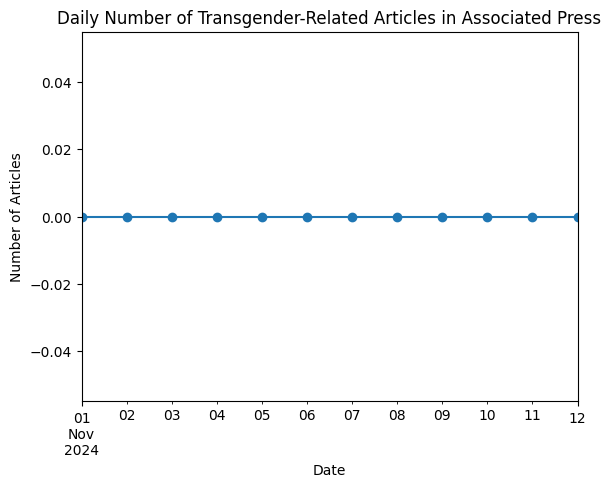

In [13]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Function to fetch articles using News API
def fetch_articles(api_key, query, from_date, to_date, sources='associated-press'):
    url = f"https://newsapi.org/v2/everything?q={query}&from={from_date}&to={to_date}&sources={sources}&apiKey={api_key}&pageSize=100"
    response = requests.get(url)
    data = response.json()
    return data['articles']

# Function to filter articles for transgender topics
def is_transgender_related(article_title, article_description):
    keywords = {'transgender', 'trans', 'lgbt', 'gender', 'nonbinary', 'transition', 'pronouns'}
    title_tokens = set(word_tokenize(article_title.lower()))
    description_tokens = set(word_tokenize(article_description.lower()))
    tokens = title_tokens.union(description_tokens)
    return not keywords.isdisjoint(tokens)

# Function to count articles by date
def count_articles_by_date(articles):
    counts = {}
    for article in articles:
        date = article['publishedAt'][:10]
        if date in counts:
            counts[date] += 1
        else:
            counts[date] = 1
    return counts

# Function to plot the article counts
def plot_article_counts(counts):
    dates = pd.date_range(start="2024-11-01", end="2024-11-12")
    counts_series = pd.Series([counts.get(date.strftime('%Y-%m-%d'), 0) for date in dates], index=dates)
    counts_series.plot(kind='line', marker='o')
    plt.title('Daily Number of Transgender-Related Articles in Associated Press')
    plt.xlabel('Date')
    plt.ylabel('Number of Articles')
    plt.show()

def main():
    api_key = 'c0b78cfddd2d4d14ad702b7cd3fbdb98'
    from_date = '2024-11-01'
    to_date = '2024-11-12'
    query = 'transgender OR lgbt OR gender'

    # Fetch articles from News API
    articles = fetch_articles(api_key, query, from_date, to_date)

    # Filter articles related to transgender topics
    transgender_articles = [
        article for article in articles
        if is_transgender_related(article['title'], article.get('description', ''))
    ]

    # Count articles by publication date
    article_counts = count_articles_by_date(transgender_articles)

    # Plot the daily counts
    plot_article_counts(article_counts)

if __name__ == '__main__':
    main()